# Fun with numpy.random
Exploring numpy.random library as assignment for Programming for Data Analysis, GMIT 2019

Lecturer: dr Brian McGinley

>Author: **Andrzej Kocielski**  
>Github: [andkoc001](https://github.com/andkoc001/)  
>Email: G00376291@gmit.ie, and.koc001@gmail.com

Created: 11-10-2019

This Notebook should be read in conjuntion with the corresponding README.md file at the assignment repository at GitHub: <https://github.com/andkoc001/fun-with-numpy-random/>, which provides background information, project progress and findings.

___

## Random Sampling

### Setting up the scene

Importing numpy.random library and version check.

In [1]:
import numpy as np # NumPy package
import matplotlib.pyplot as plt # plotting engine
# below command will allow for the plots being displayed inside the notebook, rather than in a separate screen.
%matplotlib inline

In [2]:
np.version.version

'1.17.2'

A built-in help is available, accessible through the following commands:  
`dir()` prints out available funtionalitis of the parsed method  
`help()` shows doc-string of the parsed method

In [3]:
# dir(np.random) # commented out for clarity

In [4]:
# help(np.random.randint) # commented out for clarity

A quick test of the numpy.random routine.

In [5]:
np.random.random() # get a random float number from *uniform distributtion* on [0,1)

0.5233703443761146

___

### Simple random data

Note 1: In this notebook terms _funtion_, _method_, _routine_ and _subroutine_ are used interchangebly.  
Note 2: `np.random` generates pseudo-random numbers, but for simplicity in this notebook _random_ is used interchangebly.

NumPy comes with a large numbers of built-in funtionalities, in the library documentation refered as to routines. Random sampling (`numpy.random`) is an example of such a routine (function). 

**Simple random data** is a collection of methods used for two applications:  
1) generating of a pseudo random number from a range,  
2) random selection of an object from a list.

In the first category, there are several methods, producing different outputs. For instance, the `np.random.random()` generates float numbers from half-open range [0,1), whereas `np.random.randint()` generates integer numbers from a range.

The second category, offers the funtionality of random picking of objects from an existing list. 

Below we will see example use of a few methods from the Simple random data.

`np.random.random`  
This method returns random float number(s) from _uniform distribution_ on [0,1), i.e. from 0 (inclusive) to 1 (exclusive)

In [6]:
# get a random float number from *uniform distributtion* on [0,1), i.e. from 0 (inclusive) to 1 (exclusive)
np.random.random()

0.1561765094703449

In [7]:
# get 5 random numbers from [0,1) and print out avarage of them
sum = 0
for i in range(5):
    x = np.random.random()
    sum = sum + x
    print(i+1,": ",x)
print("Mean:",sum/5)

1 :  0.9266769878789866
2 :  0.8815378953140861
3 :  0.5296960380530527
4 :  0.21118546017035011
5 :  0.22906717967790424
Mean: 0.555632712218876


In [8]:
# get a n-dimensional array (ndarray) of random numbers on [0,1); when no value is parsed, it returns a simple float number
np.random.random((2,3)) # double brackets, because this method takes a single value only - in this case a tuple

array([[0.96353808, 0.4202728 , 0.11603736],
       [0.14794285, 0.70468257, 0.32528109]])

`np.random.randn`  
This method generates a n-dimmensional array of numbers from the _standard normal distribution_.

In [9]:
np.random.randn(2, 4)

array([[-0.46927525, -0.13330853, -1.54446145, -1.94313471],
       [ 0.84287222,  0.48985124,  1.15614384, -0.77034736]])

It may be convenient to compare the `random` and `randn` subroutines to each other with results visualised on a plots.  
Plotting random distribution vs normal distribution.

/home/ak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/ak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


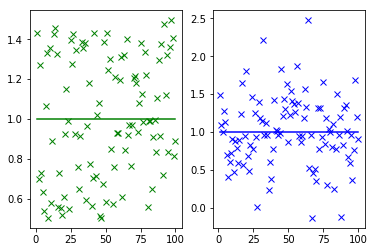

In [10]:
x = np.arange(0.0, 101, 1) # set range of x values for plotting
y1 = x/x # constant horizontal line against x - will be used as a baseline for showing random noise
y2 = x/x # - will be used as a baseline for showing normal noise
noise_random = np.random.random(size=(len(x)))-0.5 # random noise in on (0,1] and offset by0.5 in order to centralise about the base line
noise_normal = np.random.normal(0.0, 0.5, len(x)) # normal distribution of noise

plt.subplot(1, 2, 1)
plt.plot(x, y1, 'g-') # baseline for random distribution noise
plt.plot(x, y1 + noise_random, 'gx') # green x-es denote random noise value for each sample

plt.subplot(1, 2, 2)
plt.plot(x, y2, 'b-') # baseline for normal distribution noise
plt.plot(x, y2 + noise_normal, 'bx') # blue x-es denote normal noise value for each sample

**np.random.randint**  
This method generates intiger number(s) in a given range.

In [11]:
np.random.randint(1,11, size=3) # 3 random integers in range (1,10) - inclusive

array([4, 3, 4])

In the second category of subroutines of simple random data, from a pre-defined pool of objects.

**np.random.choice**  
This method returns items (not necesserily numbers) from an existing list.

In [12]:
list_1 = [1,2,3,4] # predefinition of list of numbers
list_2 = ["dog", "cat", "snake", "rat"] # predefinition of list of animals

np.random.choice(list_2, size=7)

array(['dog', 'cat', 'snake', 'cat', 'dog', 'cat', 'cat'], dtype='<U5')

It is also possible to assign a probability for each option:

In [13]:
np.random.choice(list_1, p=[0.1, 0.1, 0.1, 0.7], size=10)

array([4, 3, 4, 1, 4, 4, 2, 4, 4, 4])

**np.random.bytes**  
Returns random bytes in hexadecimal format. For example:

In [14]:
np.random.bytes(1)

b'\xf1'

### Permutations

This group of methods in NumPy and allow to randomly reorder the objects in the set or in sub-set (range). It consists of two subroutines: `shuffle` and `permutation`.

#### **random.shuffle**  
`np.random.shuffle` method randomly reorders the items of the entire set _in place_, that is original order is overwritten with the new sequence.

In [15]:
print(list_1) # in original order
np.random.shuffle(list_1)
list_1 # in new order, overwriting the original

[1, 2, 3, 4]


[4, 3, 1, 2]

#### **random.permutation**
`np.random.permutation` method returns a new array (copy of the original) of the objects from a list, randomly ordered.

In [16]:
# we are using lists from previous examples, defined in cells above
np.random.permutation(list_1)

array([4, 2, 3, 1])

It is worth noting that `np.random.permutation` is built up on `np.random.shuffle` subroutine, which is used in the former source code. Extra functionality is provided on codition an array is parsed. Other wise, when an integer is parsed, it behaves as ordinary `shuffle` function.

___

### Distributions

NumPy comes with a selection of built-in random distributions, which are used to sample random data in a specific pattern from statistical science.
In NumPy v1.17.2, there are thirty-five different distributions available. Below we will discuss five ot them, namely: uniform, standard_normal, binomial, exponential, weibull.

#### **Uniform distribution**

`numpy.random.uniform` function genrerates random floating point number(s). Each random value returnd from this method is equally probable to occure. The generated numbers are from half-open range - ends decfined when the function is called. If the range is not defined, by defoult it is assumed to be [0,1), in which case the subroutine behaves the same as np.random.random one.

In [17]:
np.random.uniform(size=3)

array([0.21090564, 0.38414879, 0.39052621])

In [18]:
np.mean(np.random.uniform(0.9,1, size=10) * 10)

9.417217688670165

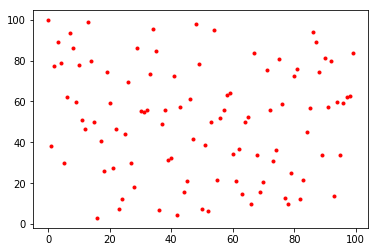

In [19]:
plt.plot(np.random.uniform(0,100, size=100), 'r.')

The uniform distribution shows a property to fill out histograms bins uniformly, which becomes clearer for increasing number of samples.

(array([ 99436.,  99535., 100419.,  99937.,  99892.,  99766., 100207.,
        100479., 100172., 100157.]),
 array([3.41060496e-04, 1.00002988e+01, 2.00002566e+01, 3.00002143e+01,
        4.00001721e+01, 5.00001299e+01, 6.00000876e+01, 7.00000454e+01,
        8.00000031e+01, 8.99999609e+01, 9.99999187e+01]),
 <a list of 10 Patch objects>)

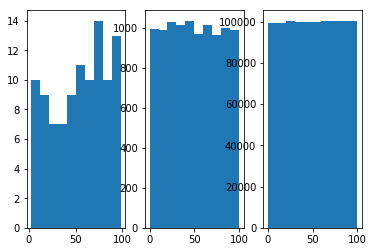

In [20]:
plt.subplot(1, 3, 1)
plt.hist(np.random.uniform(0,100, size=10**2)) # 100 samples

plt.subplot(1, 3, 2)
plt.hist(np.random.uniform(0,100, size=10**4)) # 10000 samples

plt.subplot(1, 3, 3)
plt.hist(np.random.uniform(0,100, size=10**6)) # 1000000 samples

#### **Standard normal distribution**  

`numpy.random.standard_normal` draws a standard normal (Gaussian) distribution for mean=0 and diviation=1 (another NumPy distribution, `np.random.normal`, allows to change these parameters). The more samples, the more "ideal" shape of the distribution.

Actual minimum:  -3.1643925879863475
Actual maximum:  3.101418284657819
Actual mean:  -0.019445672142960616
Actual standard diviation:  1.034727845228721


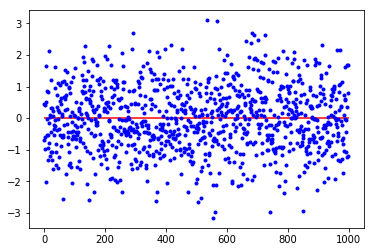

In [21]:
a = np.random.standard_normal(size=1000) # standard normal distribution generation for n=1000 samples

plt.hlines(0,0,1000, colors='r') # baseline 
plt.plot(a, 'b.')

# for reference, actual distribution parameters from the generated set
print("Actual minimum: ", np.min(a))
print("Actual maximum: ", np.max(a))
print("Actual mean: ", np.mean(a))
print("Actual standard diviation: ", np.std(a))

(array([  4.,   5.,   6.,  25.,  17.,  48.,  73.,  92., 120., 116., 112.,
         98.,  91.,  78.,  41.,  35.,  21.,  11.,   5.,   2.]),
 array([-3.16439259, -2.85110204, -2.5378115 , -2.22452096, -1.91123041,
        -1.59793987, -1.28464933, -0.97135878, -0.65806824, -0.3447777 ,
        -0.03148715,  0.28180339,  0.59509394,  0.90838448,  1.22167502,
         1.53496557,  1.84825611,  2.16154665,  2.4748372 ,  2.78812774,
         3.10141828]),
 <a list of 20 Patch objects>)

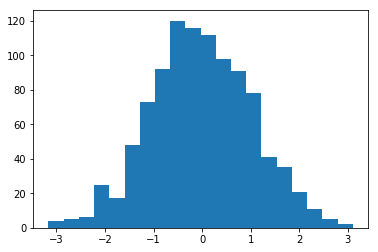

In [22]:
plt.hist(a, bins=20)

#### **Binomial distribution**

`np.random.binomial` samples from binomial distribution, where the results are two-folds, often represented as a _success_ or a _failure_. This distribution gives number of successeful trials of `n`-total number of trials. Each result has a predefined `p`-probablity of success.
For a large number of repetition (represented in NumPy by parameter _size_), and equal probability of winning (p=0.5), the result resambles a normal distribution.

In [23]:
np.random.binomial(1,0.5, size=10) # for 10 attempts, what is the result of the test, 1 - success, 0 - failure

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1])

Actual mean:  4.9747
Actual standard diviation:  1.5847586283090558


<function matplotlib.pyplot.show(*args, **kw)>

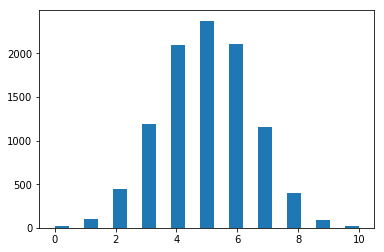

In [24]:
a = np.random.binomial(10,0.5, size=10000) # how many success will be in n=10 trials of tossing a 'fair' coin (p=0.5), test repetead 10000 times
print("Actual mean: ", np.mean(a))
print("Actual standard diviation: ", np.std(a))
plt.hist(a, bins=21) # density of successes in 10-trials binomial tests repeated 10000 times
plt.show # this command will hide away numeral values of the output - for clarity

#### **Exponential distribution**  

`numpy.random.exponential` function draws results from exponential distribution. This type of distribution is typically used to caluclate the probability of an event occuring in a time interval. It takes two parameters, the first one being the _scale_, which relates to the time period, and the other one - _size_, which is a number of experiments (by default size=10). For example, if independent events are to occur per unit of time (which is a function of parameter _scale_), the exponential distribution describes the time intervals between successive events.  
Exponential distribution is a special case of gamma distribution, and is related to Poisson distribution.  
Below is an example of the distribution and the graphical interpretation.

<function matplotlib.pyplot.show(*args, **kw)>

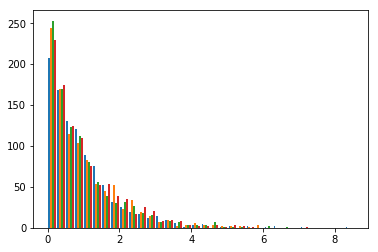

In [39]:
a = np.random.exponential(1, [1000,4]) # the first parameter (scale) relates to time period, the second one (size) - to number of experiments (8 sets of 1000 experiments)
plt.hist(a, bins=34) 
plt.show # this command will hide away numeral values of the output - for clarity

#### **Weibull distribution**

`numpy.random.weibull` subroutine produces results from weilbull distribution. This probability distribution is often used in equipment reliability, e.g. to evaluate mean time between failures (MTBF). The function takes two parameters: shape and size. The shape must be greate than one and relates to the slope of the regressed line in probability plot' (Realiawiki). For shape > 1 the probability density distrubution resembles normal distribution, but skewed; for shape < 1 it resembles exponential distribution.

<function matplotlib.pyplot.show(*args, **kw)>

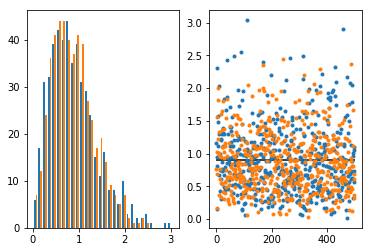

In [110]:
a = np.random.weibull(2, [500,2]) # the first parameter (shape), the second one (size) - to number of experiments (2 sets of 500 experiments)
plt.subplot(1, 2, 1)
plt.hist(a, bins=30)

plt.subplot(1, 2, 2)
plt.plot(a, '.')
plt.hlines((np.mean(a)),0,500, colors='k') # draws a horizontal line at mean-value

plt.show # this command will hide away numeral values of the output - for clarity